In [41]:
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#
from tensorflow.keras. metrics import FalseNegatives, FalsePositives, TrueNegatives
from tensorflow.keras. metrics import TruePositives, Precision, Recall
#
from tensorflow.keras.optimizers import Adam





In [3]:
data = pd.read_csv('Data/parkinsons.data')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


D:\Mateo\envs\testenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


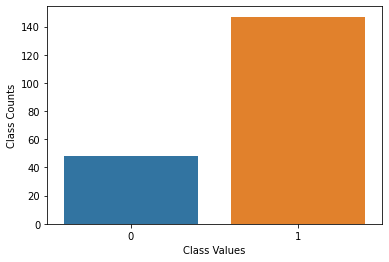

In [15]:
sns.countplot(data['status'].values)
plt.xlabel('Class Values')
plt.ylabel('Class Counts')
plt.show()

In [8]:
del data['name']

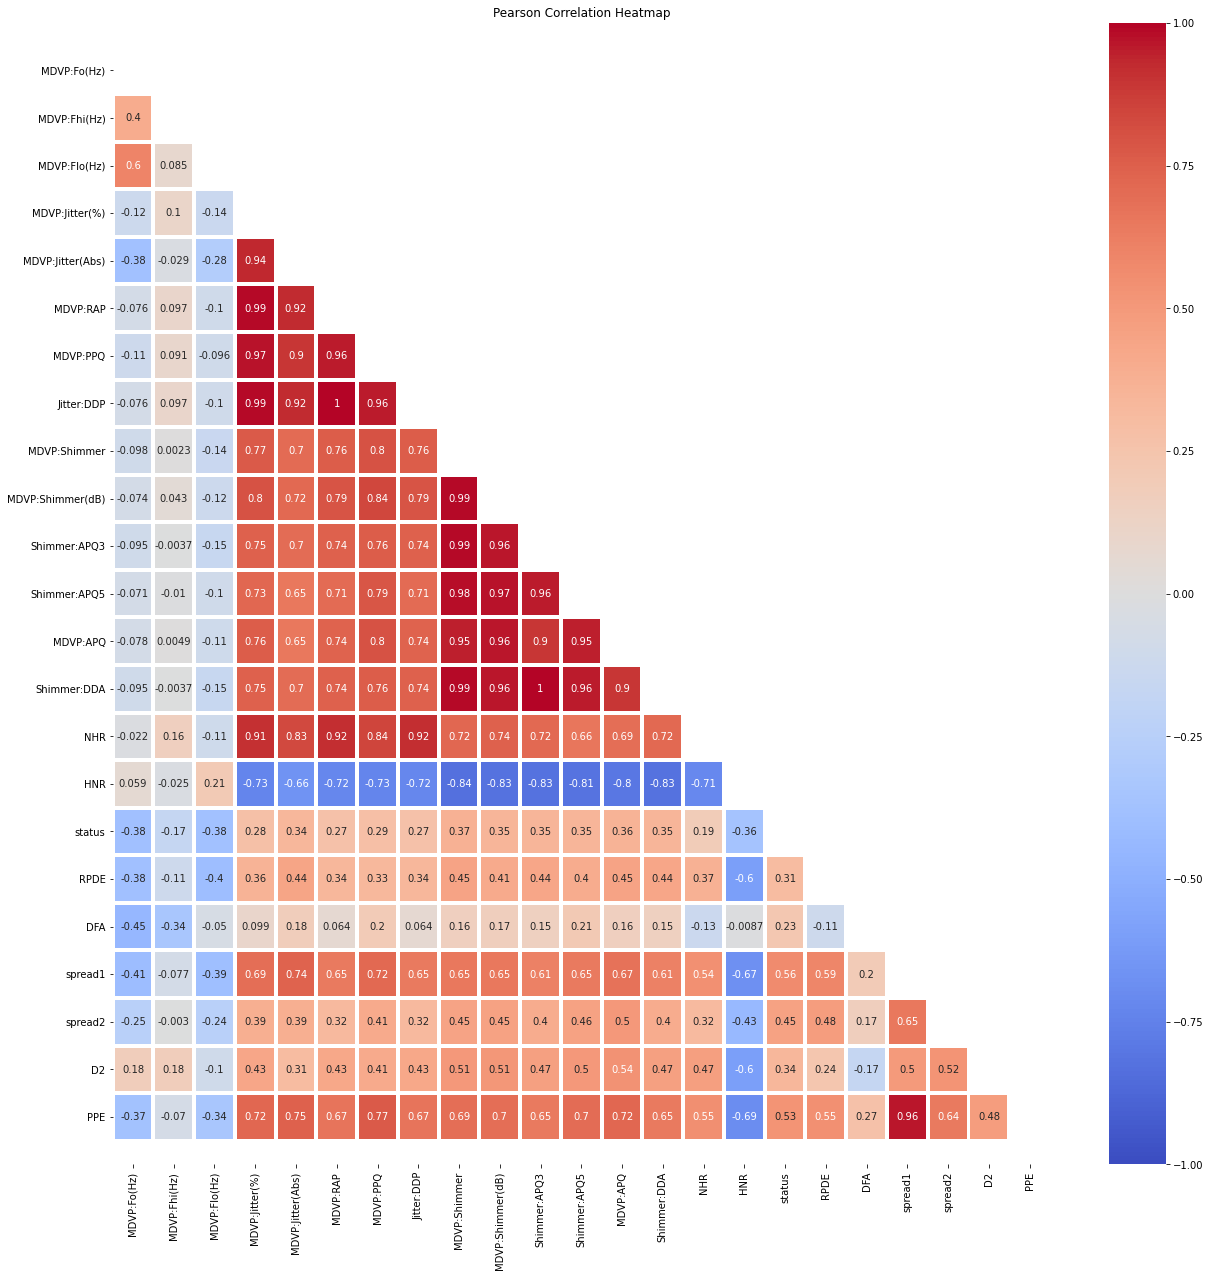

In [18]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(21,21))
plt.title("Pearson Correlation Heatmap")
#mask = np.tril(df.corr())
sns.heatmap(corr,
            mask=mask,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot = True, # to show the correlation degree on cell
           vmin=-1,
           vmax=1,
           center= 0,
           fmt='0.2g', #
           cmap= 'coolwarm',
           linewidths=3, # cells partioning line width
           linecolor='white', # for spacing line color between cells
           square=False,#to make cells square 
           cbar_kws= {'orientation': 'vertical'}
           )

b, t = plt.ylim() 
b += 0.5  
t -= 0.5  
plt.ylim(b,t) 
plt.show()


In [21]:
print("Column Name       No° Null Values \n")
data.isnull().sum()

Column Name       No° Null Values 



MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [24]:
print("Column Name       No° NA Values \n")
data.isna().sum()

Column Name       No° NA Values 



MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [27]:
print("Number of duplicated rows: ",data.duplicated().sum())

Number of duplicated rows:  0


In [46]:
data.columns[0]

'MDVP:Fo(Hz)'

In [ ]:
g = sns.displot(
    data=data, kind="ecdf",
    x=data.columns[1], col="sex", hue="species",
)

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
n_axis = 221
distplot = plt.figure(figsize=(20,20))
ax = []
i = 0
for col in data.columns:
    ax.append(distplot.add_subplot(n_axis))
    ax[i].distplot(data[data['status'] == 0][col], bins=30, kde=True, label='Healthy')
    ax[i].distplot(data[data['status'] == 1][col], bins=30, kde=True, label='Parkinson\'s')    
    ax[i].legend()
    ax[i].title("Distribution of feature : " + str(col))                    # setting title of the figure
    i += 1
    n_axis +=1

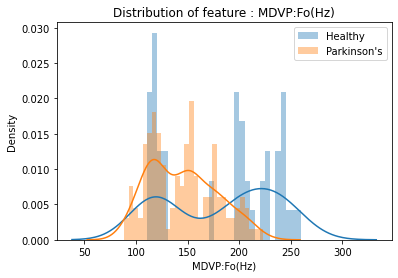

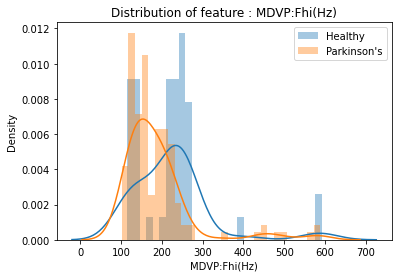

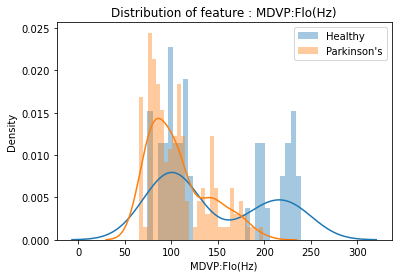

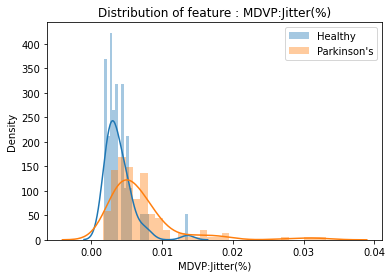

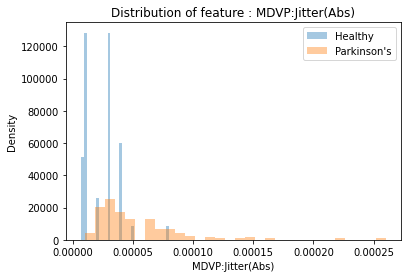

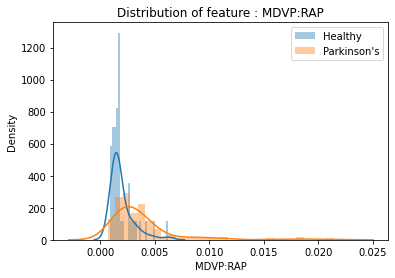

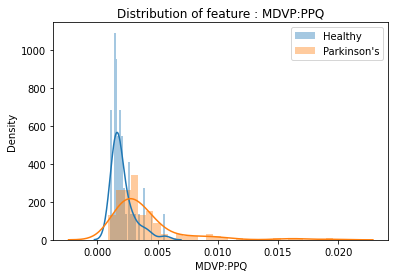

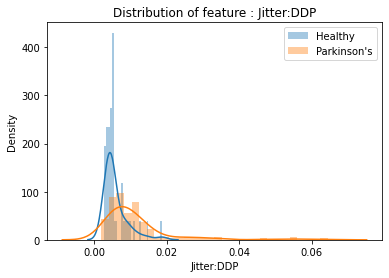

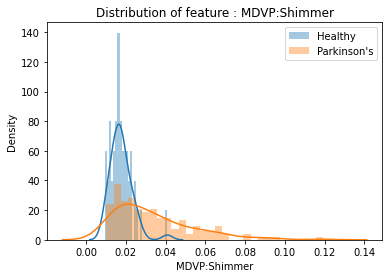

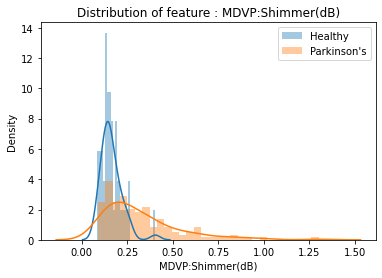

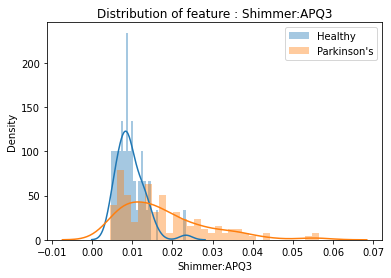

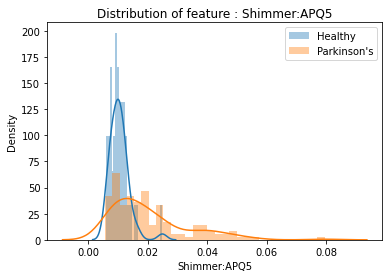

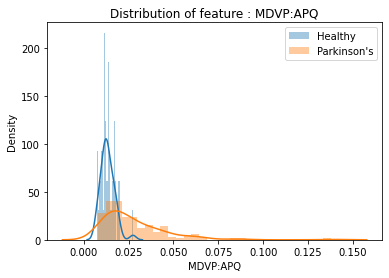

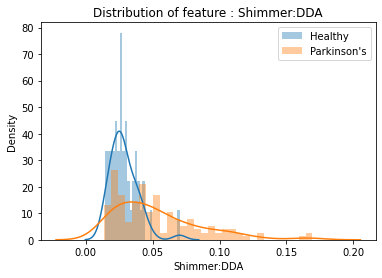

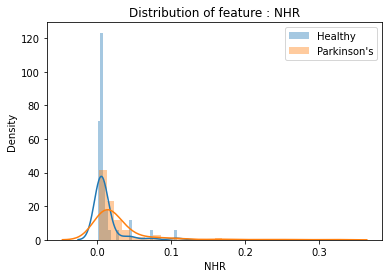

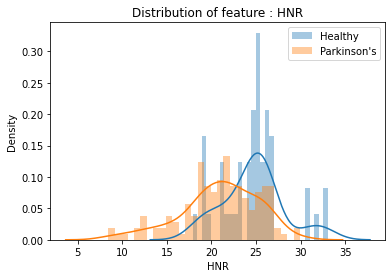

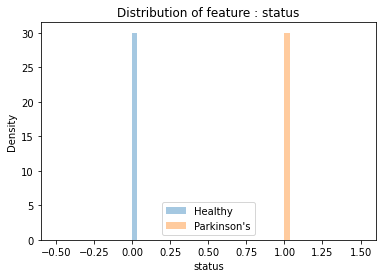

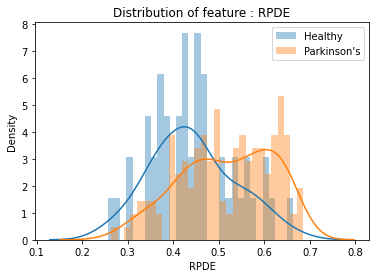

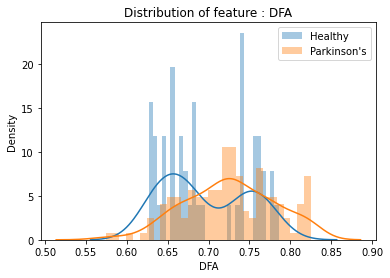

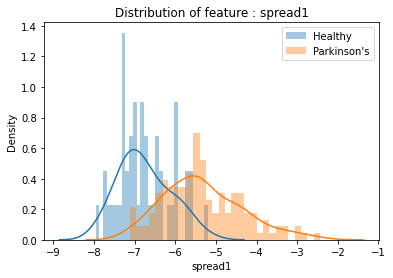

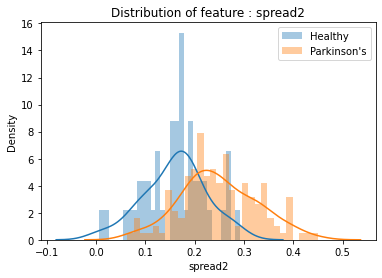

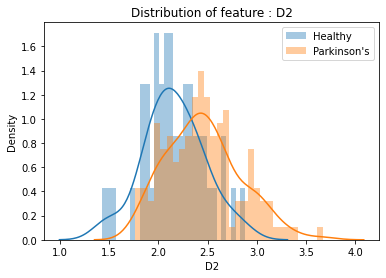

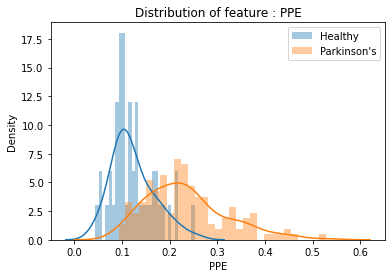

In [49]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

for col in data.columns:
    fig = sns.distplot(data[data['status'] == 0][col], bins=30, kde=True, label='Healthy')
    # seaborn distplot to examine distribution of the feature of Parkinson's patient
    fig = sns.distplot(data[data['status'] == 1][col], bins=30, kde=True, label='Parkinson\'s')
    plt.legend()
    plt.title("Distribution of feature : " + str(col))                    # setting title of the figure
    plt.show()
    

In [52]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, stratify = data['status'],random_state = 42)

In [54]:
X_train = train[data.columns[data.columns != 'status']]
y_train = train.status
X_test = test[data.columns[data.columns != 'status']]
y_test = test.status


In [57]:
# crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta los parámetros del scaler
scaler.fit(data.drop('status',axis=1))
print (scaler.mean_)

# escala training y test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[ 1.54228641e+02  1.97104918e+02  1.16324631e+02  6.22046154e-03
  4.39589744e-05  3.30641026e-03  3.44635897e-03  9.91994872e-03
  2.97091282e-02  2.82251282e-01  1.56641538e-02  1.78782564e-02
  2.40814872e-02  4.69926154e-02  2.48470769e-02  2.18859744e+01
  4.98535538e-01  7.18099046e-01 -5.68439674e+00  2.26510349e-01
  2.38182609e+00  2.06551641e-01]
